In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data', index_col=0)

In [41]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [46]:
df.rename(columns={ 'TARGET CLASS' : 'target'}, inplace= True)

In [54]:
df.iloc[ :, :-1].shape

(1000, 10)

In [55]:
column = df.columns.tolist()

In [56]:
column[0:-1]

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

In [57]:
column = [c for c in column if c not in ['target']]

In [58]:
column

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

In [59]:
targets = "target"

In [62]:
x = df[column]
y= df[targets]

state= np.random.RandomState(42)
x_out = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))

In [63]:
print(x.shape)
print(y.shape)

(1000, 10)
(1000,)


In [65]:
df.isnull().values.any()

False

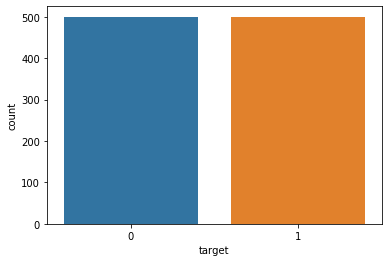

In [67]:
sns.countplot(df['target'])

In [68]:
cat1 = df[df['target']==1]
cat2 = df[df['target']==0]

In [69]:
print(cat1.shape, cat2.shape)

(500, 11) (500, 11)


# Standardize the features

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
scaled_df = pd.DataFrame(scaled_feature, columns= df.columns[:-1])
scaled_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [28]:
from sklearn.model_selection import train_test_split,  cross_val_score
x_train, x_test, y_train, y_test = train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.2 ,random_state = 0)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=99)

In [12]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=99, p=2,
                     weights='uniform')

In [13]:
pred = knn.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [15]:
confusion_matrix(y_test, pred)

array([[ 77,   9],
       [  4, 110]])

In [16]:
r2_score(y_test, pred)

0.7348021215830274

In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        86
           1       0.92      0.96      0.94       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



# Choosing a K value

In [18]:
error_rate=[]

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

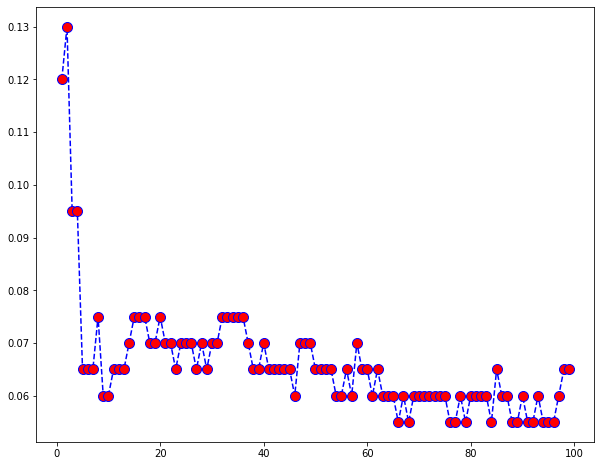

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rate,color='blue',markerfacecolor='red', markersize=10, marker='o', linestyle='dashed' )

# Bonus analysis

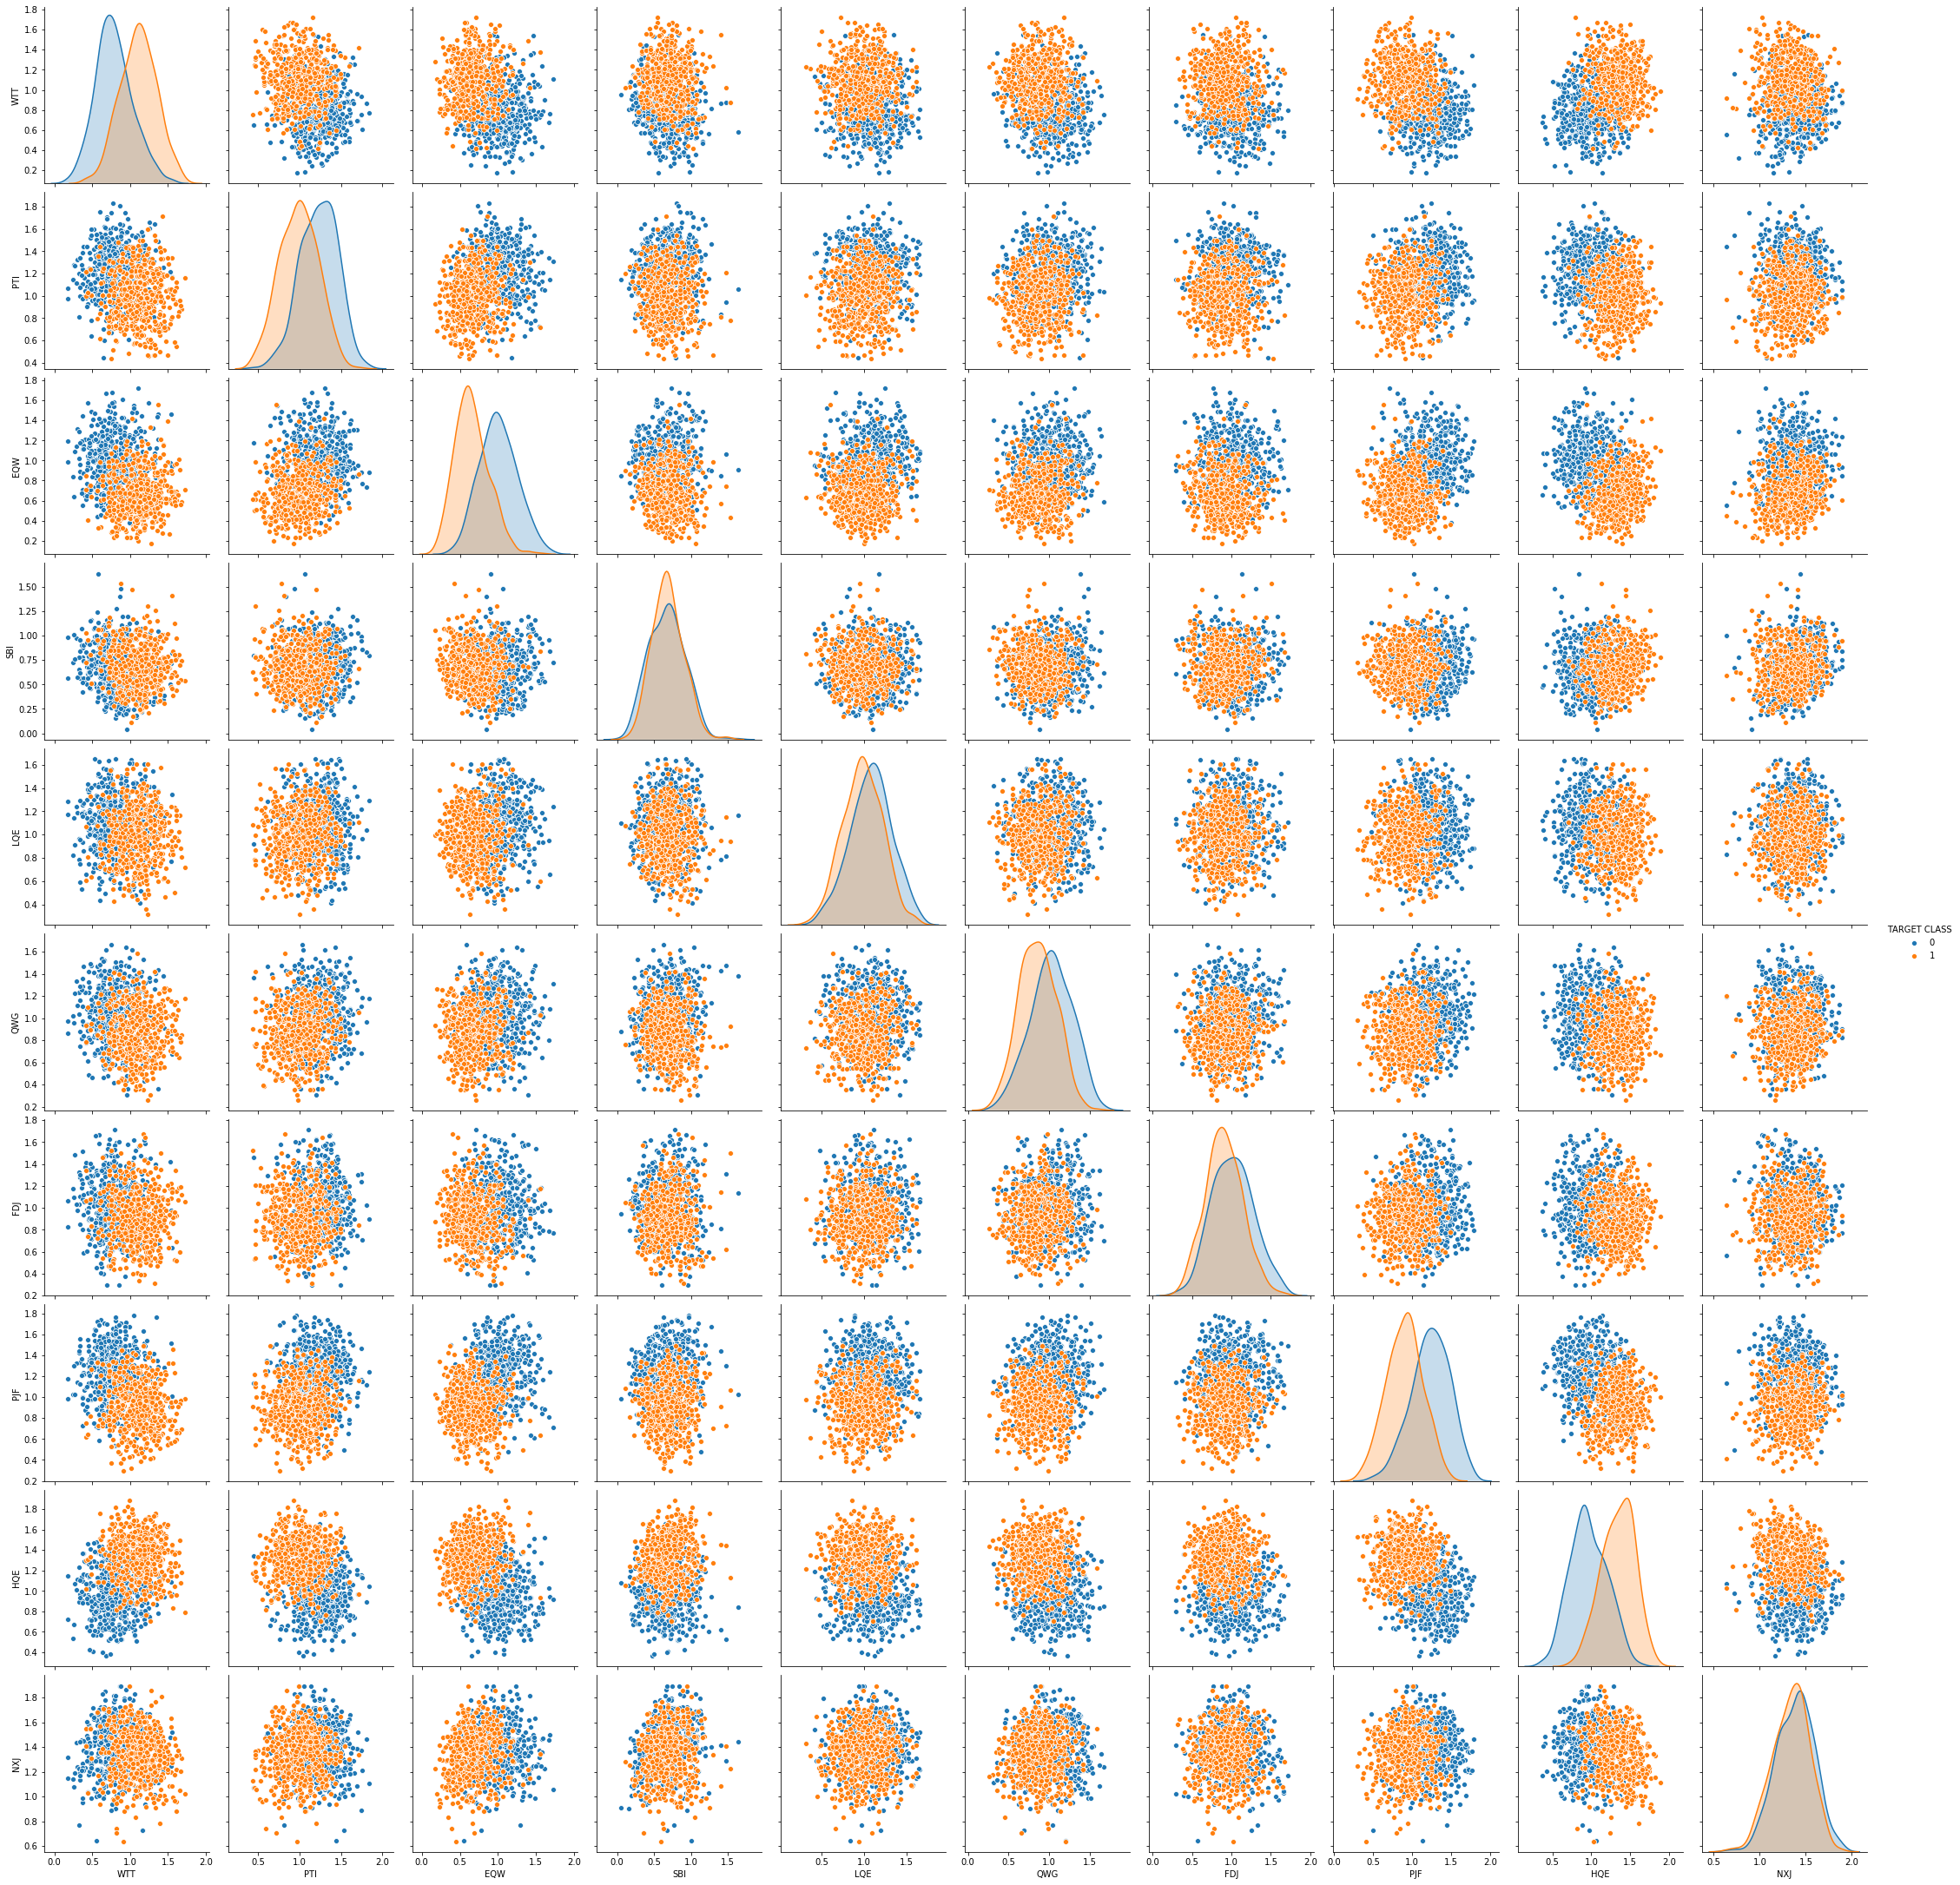

In [24]:
sns.pairplot(df, hue='TARGET CLASS', height = 3)

In [33]:
accuracy_rate=[]

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, scaled_df, df['TARGET CLASS'], cv=10 )
#     knn.fit(x_train, y_train)
#     pred = knn.predict(x_test)
    accuracy_rate.append(np.mean(score))

In [34]:
error_rate=[]

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, scaled_df, df['TARGET CLASS'], cv=10 )
#     knn.fit(x_train, y_train)
#     pred = knn.predict(x_test)
    error_rate.append(1-np.mean(score))

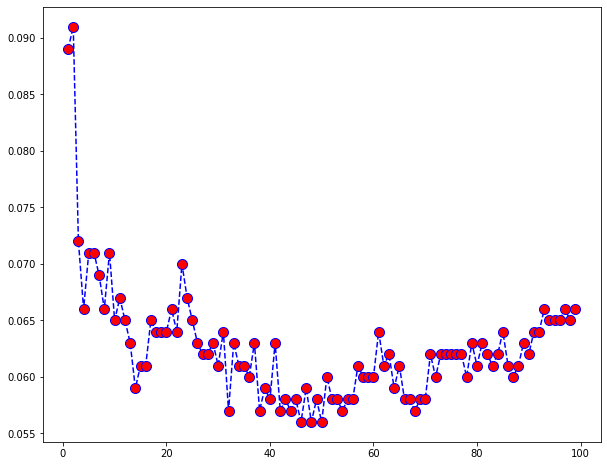

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 100), error_rate,color='blue',markerfacecolor='red', markersize=10, marker='o', linestyle='dashed' )